In [1]:
#NOTE: Trained on the filtered CGM data
#NOTE: Add values and lags for CGM gradient

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Glucose_processor import GlucoseDataProcessor
from models.model_E import BloodGlucosePredictorE

In [2]:
# Define prediction horizons (in minutes, adjust as needed)
horizons = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]

# Initialize the BloodGlucosePredictor
bg_predictor = BloodGlucosePredictorE(horizons=horizons)

In [3]:
Glucose_data = GlucoseDataProcessor(CGM_file_path="CGM_data.csv", bolus_file_path="Bolus_data.csv", carb_file_path="Carb_data.csv",
                                    min_range=69, max_range=180, target=85, tp=75, td=280, dp=45, dd=180)


df = Glucose_data.create_filtered_DataFrame()

df

Time         CGM  CGM Gradient  Insulin Activity  \
3255  2024-12-09 01:57:16   74.633941     -0.475844          0.000000   
3254  2024-12-09 02:02:16   77.013161     -0.526178          0.000000   
3253  2024-12-09 02:07:16   79.895722     -0.634878          0.000000   
3252  2024-12-09 02:12:16   83.361943     -0.759700          0.000000   
3251  2024-12-09 02:17:16   87.477852     -0.892044          0.000000   
...                   ...         ...           ...               ...   
4     2024-12-20 13:51:28  149.673834     -0.631057          0.032914   
3     2024-12-20 13:56:27  152.754635     -0.597968          0.032283   
2     2024-12-20 14:01:27  155.653519     -0.558222          0.031558   
1     2024-12-20 14:06:27  158.336854     -0.511975          0.030786   
0     2024-12-20 14:11:27  160.773267     -0.487282          0.029946   

      Food Activity  
3255       0.000000  
3254       0.000000  
3253       0.000000  
3252       0.000000  
3251       0.000000  
...             ...  
4          0.130190  
3          0.123480  
2          0.116350  
1          0.108902  
0          0.101206  

[3256 rows x 5 columns]

In [4]:
# Preprocess the data
X_scaled, y_scaled = bg_predictor.preprocess_data(df)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build the model
input_shape = (1, X_train.shape[1])  # Shape required for LSTM (timesteps=1, features=X_train.shape[1])
bg_predictor.build_model(input_shape=input_shape)

df

d:\DiaPulse\models\model_E.py:21: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)  # Linear interpolation for missing values


Time         CGM  CGM Gradient  Insulin Activity  \
3250 2024-12-09 02:22:16   92.286805     -1.030958          0.000000   
3249 2024-12-09 02:27:16   97.802204     -1.171606          0.000000   
3248 2024-12-09 02:32:16  104.002860     -1.305223          0.000000   
3247 2024-12-09 02:37:16  110.830518     -1.420780          0.000000   
3246 2024-12-09 02:42:16  118.188673     -1.508596          0.000000   
...                  ...         ...           ...               ...   
28   2024-12-20 11:51:28  106.108622      0.050359          0.001403   
27   2024-12-20 11:56:28  105.806528      0.068076          0.001336   
26   2024-12-20 12:01:28  105.424442      0.081723          0.001270   
25   2024-12-20 12:06:27  104.989302      0.088294          0.001203   
24   2024-12-20 12:11:27  104.541506      0.085114          0.001269   

      Food Activity  hour  day_of_week  is_weekend  hour_fraction  hour_sin  \
3250            0.0     2            0           0       0.098611  0.580703   
3249            0.0     2            0           0       0.102083  0.598325   
3248            0.0     2            0           0       0.105556  0.615661   
3247            0.0     2            0           0       0.109028  0.632705   
3246            0.0     2            0           0       0.112500  0.649448   
...             ...   ...          ...         ...            ...       ...   
28              0.0    11            4           0       0.493750  0.039260   
27              0.0    11            4           0       0.497222  0.017452   
26              0.0    12            4           0       0.500694 -0.004363   
25              0.0    12            4           0       0.504167 -0.026177   
24              0.0    12            4           0       0.507639 -0.047978   

      ...     BG_t+75     BG_t+80     BG_t+85     BG_t+90     BG_t+95  \
3250  ...  181.943799  181.827779  180.515752  178.121324  174.788871   
3249  ...  181.827779  180.515752  178.121324  174.788871  170.680939   
3248  ...  180.515752  178.121324  174.788871  170.680939  165.966344   
3247  ...  178.121324  174.788871  170.680939  165.966344  160.810709   
3246  ...  174.788871  170.680939  165.966344  160.810709  155.370319   
...   ...         ...         ...         ...         ...         ...   
28    ...  118.539996  121.911326  125.417160  128.991958  132.581176   
27    ...  121.911326  125.417160  128.991958  132.581176  136.144884   
26    ...  125.417160  128.991958  132.581176  136.144884  139.656314   
25    ...  128.991958  132.581176  136.144884  139.656314  143.096135   
24    ...  132.581176  136.144884  139.656314  143.096135  146.444061   

        BG_t+100    BG_t+105    BG_t+110    BG_t+115    BG_t+120  
3250  170.680939  165.966344  160.810709  155.370319  149.788790  
3249  165.966344  160.810709  155.370319  149.788790  144.195864  
3248  160.810709  155.370319  149.788790  144.195864  138.708225  
3247  155.370319  149.788790  144.195864  138.708225  133.431383  
3246  149.788790  144.195864  138.708225  133.431383  128.460947  
...          ...         ...         ...         ...         ...  
28    136.144884  139.656314  143.096135  146.444061  149.673834  
27    139.656314  143.096135  146.444061  149.673834  152.754635  
26    143.096135  146.444061  149.673834  152.754635  155.653519  
25    146.444061  149.673834  152.754635  155.653519  158.336854  
24    149.673834  152.754635  155.653519  158.336854  160.773267  

[3227 rows x 55 columns]

In [5]:
# Train the model
model_save_path = 'saved_models/model_E.keras'
history = bg_predictor.train(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=2000,
    model_save_path=model_save_path
)

history

Epoch 1/2000


d:\DiaPulse\venv\lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0943 - mae: 0.2362 - val_loss: 0.0163 - val_mae: 0.0906
Epoch 2/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0213 - mae: 0.1060 - val_loss: 0.0105 - val_mae: 0.0726
Epoch 3/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0150 - mae: 0.0892 - val_loss: 0.0084 - val_mae: 0.0632
Epoch 4/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0128 - mae: 0.0817 - val_loss: 0.0079 - val_mae: 0.0622
Epoch 5/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - mae: 0.0763 - val_loss: 0.0068 - val_mae: 0.0560
Epoch 6/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0102 - mae: 0.0719 - val_loss: 0.0062 - val_mae: 0.0542
Epoch 7/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - mae: 0.0708 - val_loss: 0.0066 - val_mae: 0.0567
Epoch 8/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mae: 0.0651 - val_loss: 0.0066 - val_mae: 0.0605
Epoch 9/2000
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0082 -

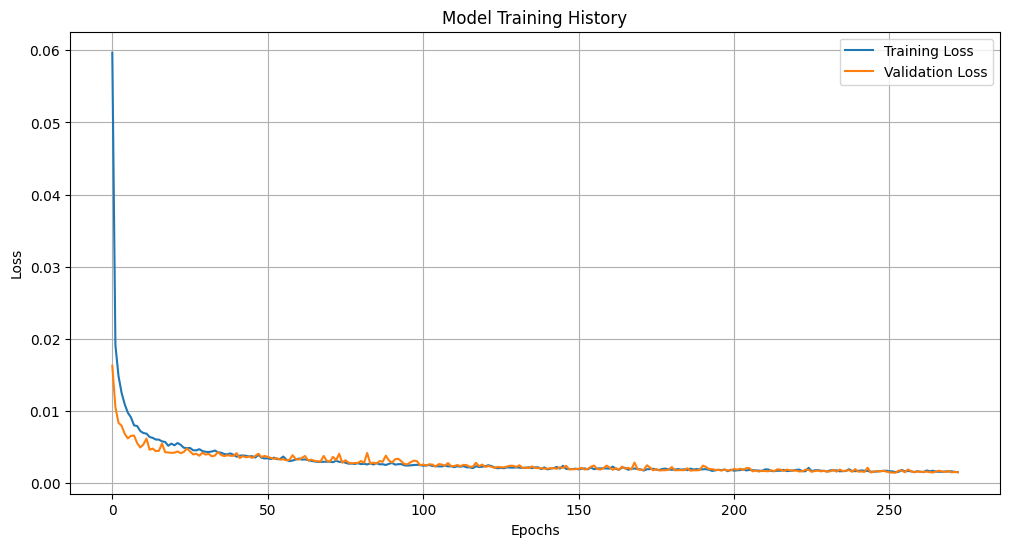

In [6]:
# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Evaluate the model on test data
loss, mae = bg_predictor.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Test Loss: 0.0012, Test MAE: 0.0226


d:\DiaPulse\venv\lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


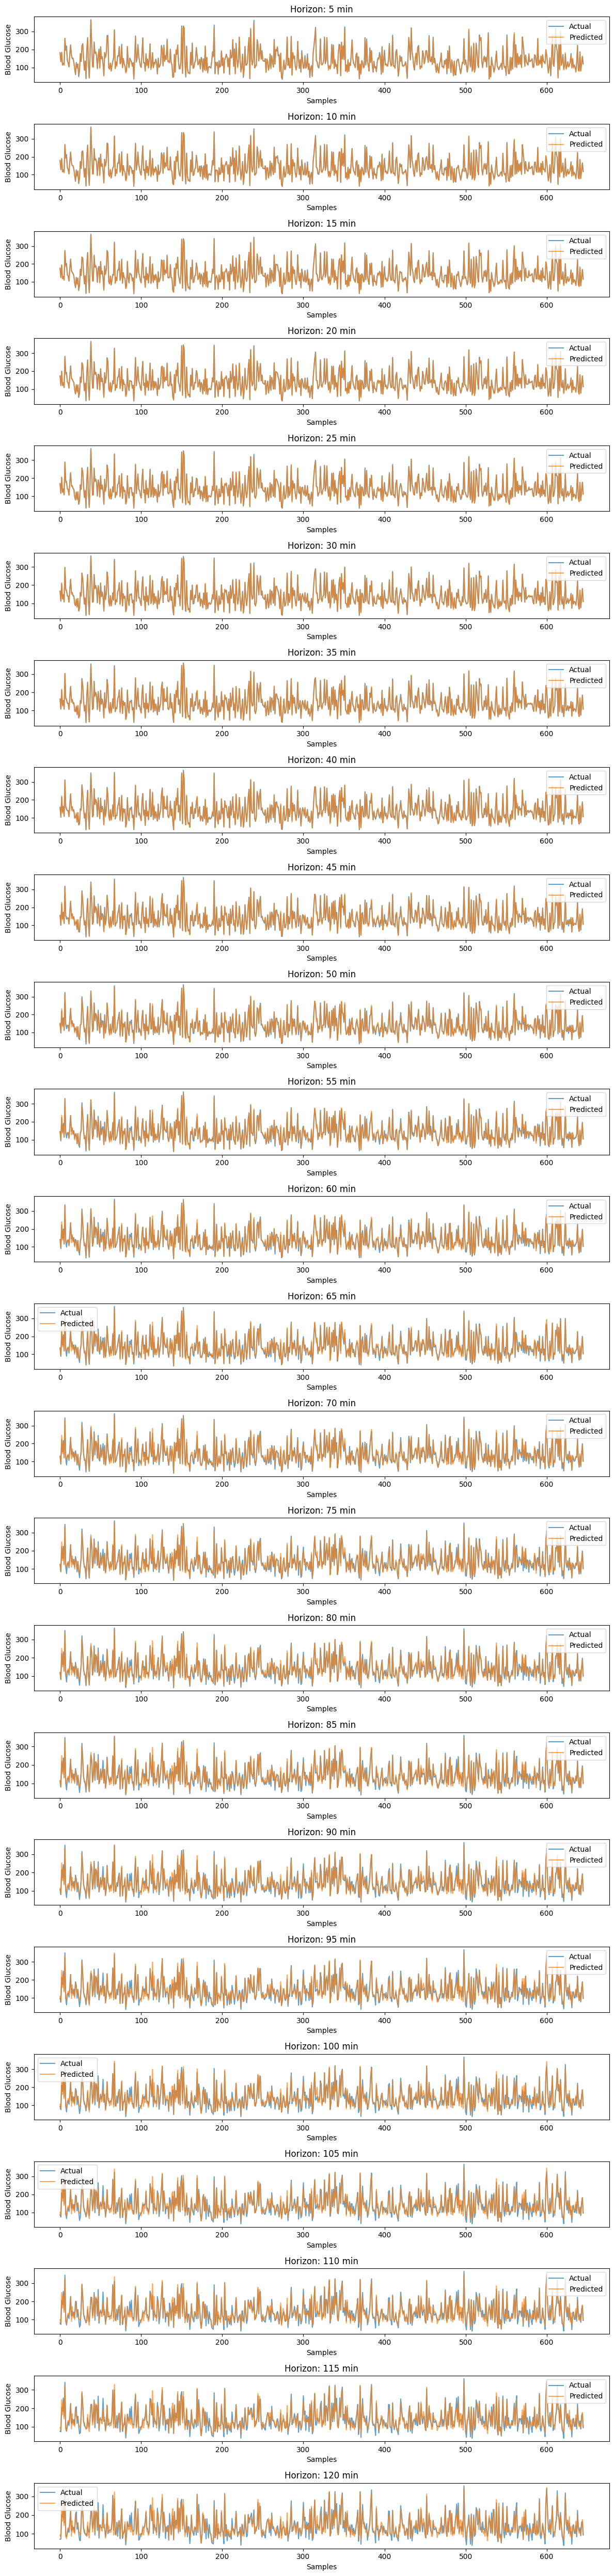

In [8]:
# Make predictions on test data
y_pred = bg_predictor.predict(X_test)

# Visualize predictions vs actual
plt.figure(figsize=(12, 50))
for i, horizon in enumerate(horizons):
    plt.subplot(len(horizons), 1, i + 1)
    plt.plot(bg_predictor.scaler_y.inverse_transform(y_test)[:, i], label='Actual', alpha=0.7)
    plt.plot(y_pred[:, i], label='Predicted', alpha=0.7)
    plt.title(f'Horizon: {horizon} min')
    plt.xlabel('Samples')
    plt.ylabel('Blood Glucose')
    plt.legend()
    plt.tight_layout()
plt.show()

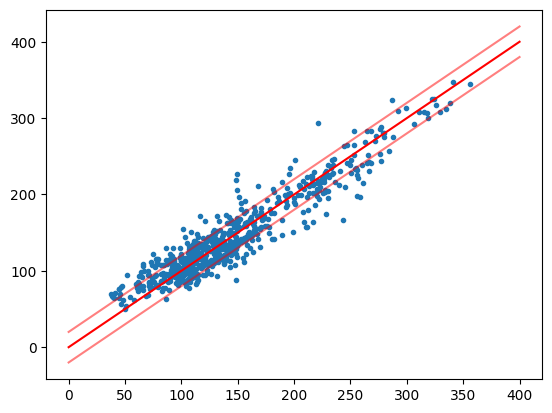

In [17]:
plt.figure()

i = 23 # Where {0: 5 min, 1: 10 min, 2: 15 min, ... 22: 120 min}

plt.plot(bg_predictor.scaler_y.inverse_transform(y_test)[:, i], y_pred[:, i], ".")

x = np.linspace(0, 400, 100)

plt.plot(x, x, "r")
plt.plot(x, x+20, "r", alpha=0.5)
plt.plot(x, x-20, "r", alpha=0.5)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


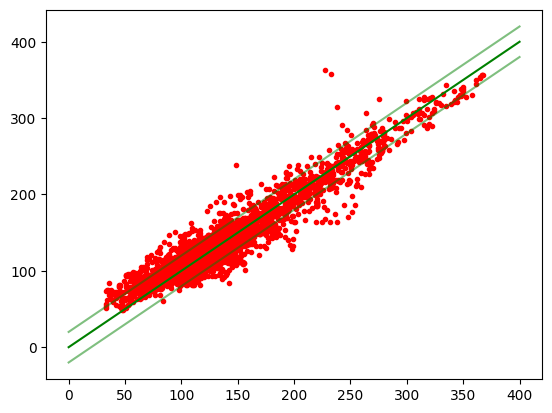

In [18]:
# Training data!!

y_train_pred = bg_predictor.predict(X_train)

plt.figure()

i = 23 # Where {0: 5 min, 1: 10 min, 2: 15 min, ... 22: 120 min}

plt.plot(bg_predictor.scaler_y.inverse_transform(y_train)[:, i], y_train_pred[:, i], ".", color="r")

x = np.linspace(0, 400, 100)

plt.plot(x, x, "g")
plt.plot(x, x+20, "g", alpha=0.5)
plt.plot(x, x-20, "g", alpha=0.5)

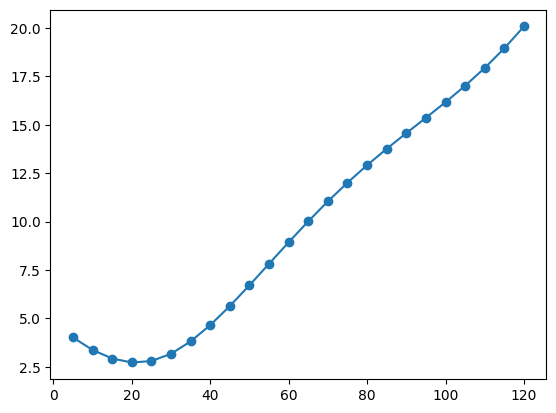

In [11]:
# Find RMSE of every horizon

from sklearn.metrics import mean_squared_error

rmse = []

for i, horizon in enumerate(horizons):
    actual = bg_predictor.scaler_y.inverse_transform(y_test)[:, i]
    pred = y_pred[:, i]
    rmse.append(np.sqrt(mean_squared_error(actual, pred)))


plt.plot(horizons, rmse, "o-")

horizons       MAE
0          5  1.758076
1         10  1.613316
2         15  1.508509
3         20  1.451066
4         25  1.475294
5         30  1.579432
6         35  1.729616
7         40  1.901475
8         45  2.078593
9         50  2.259933
10        55  2.436298
11        60  2.605020
12        65  2.763843
13        70  2.905001
14        75  3.029527
15        80  3.137391
16        85  3.235145
17        90  3.331838
18        95  3.426448
19       100  3.516396
20       105  3.613239
21       110  3.716304
22       115  3.828408
23       120  3.956913

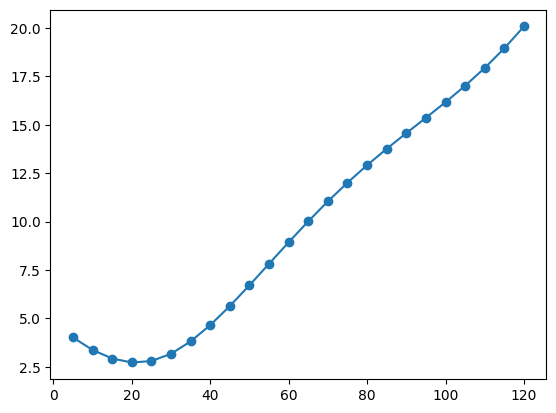

In [12]:
# Find MAE of every horizon

from sklearn.metrics import mean_absolute_error

mae = []

for i, horizon in enumerate(horizons):
    actual = bg_predictor.scaler_y.inverse_transform(y_test)[:, i]
    pred = y_pred[:, i]
    mae.append(np.sqrt(mean_absolute_error(actual, pred)))


plt.plot(horizons, rmse, "o-")

df = pd.DataFrame({"horizons": horizons, "MAE": mae})
df

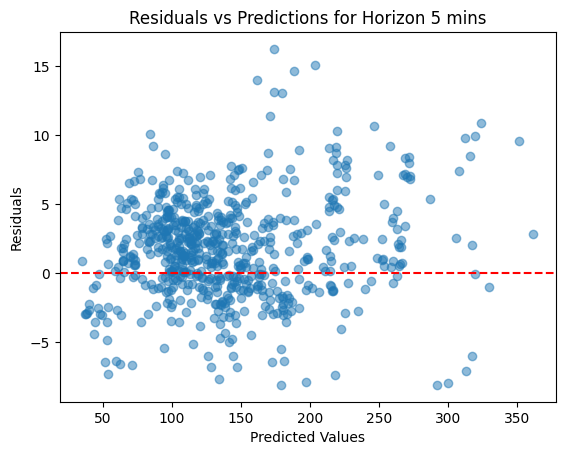

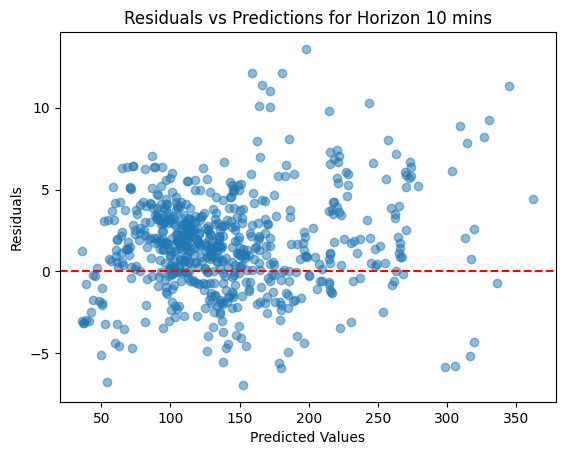

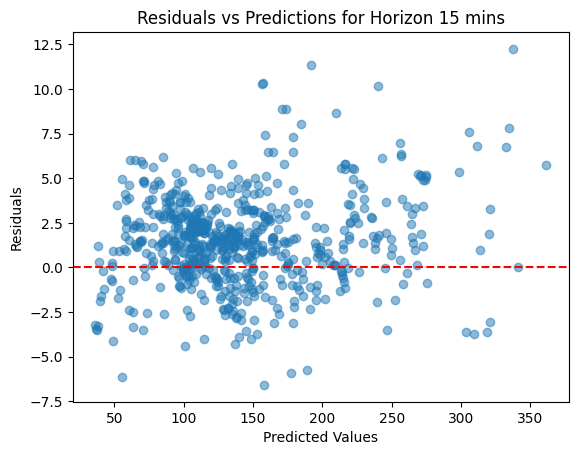

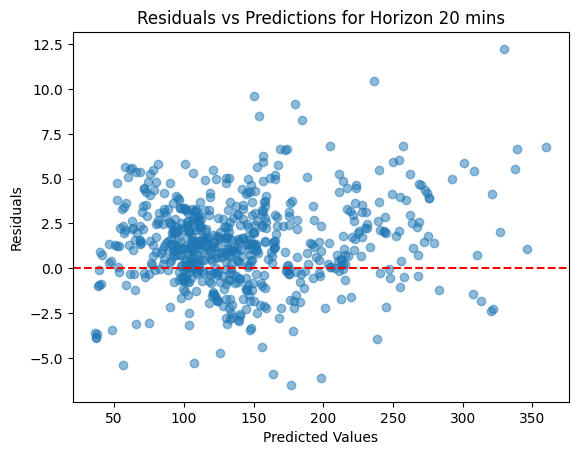

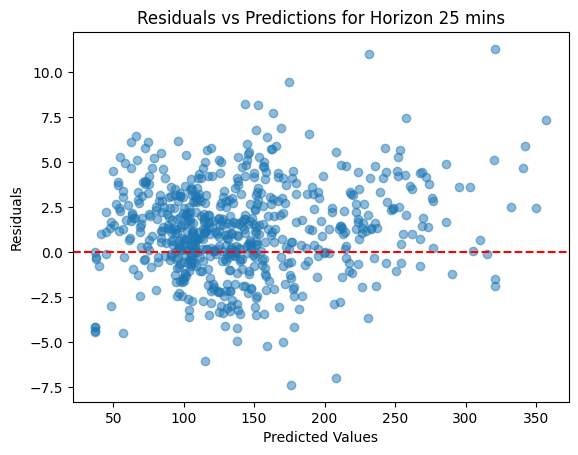

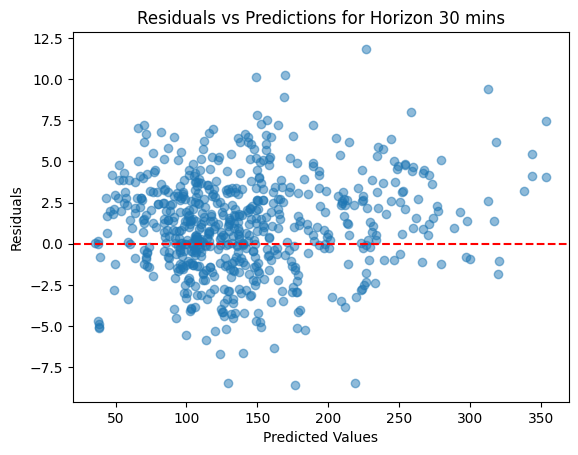

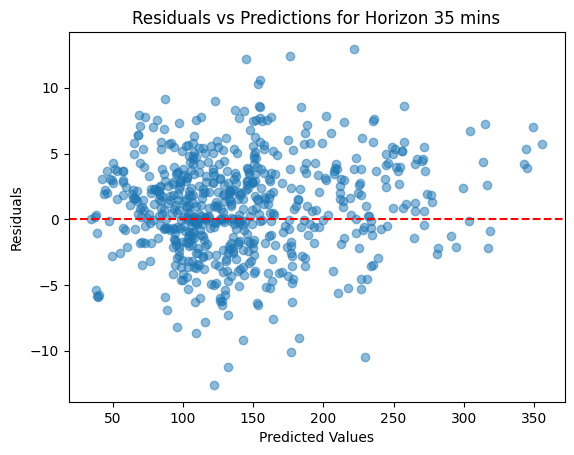

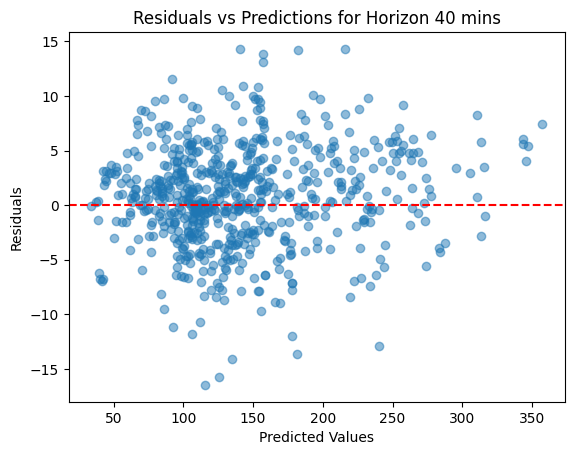

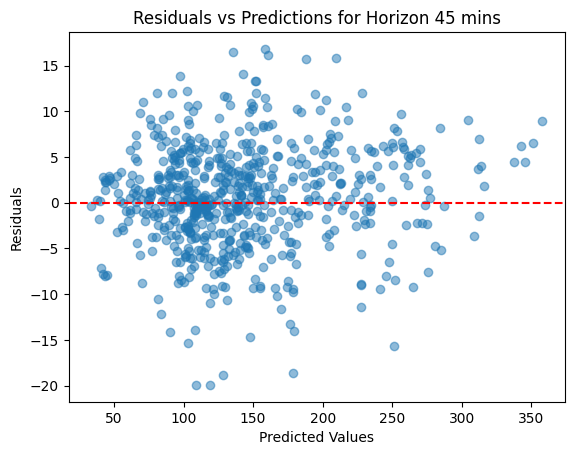

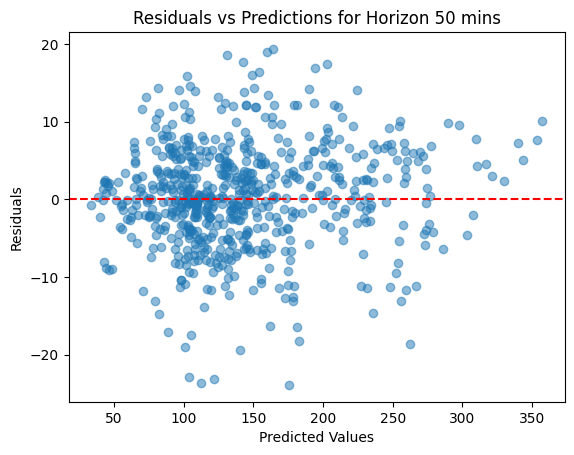

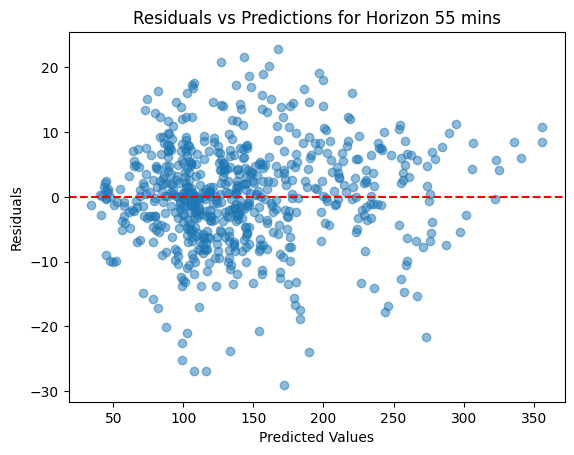

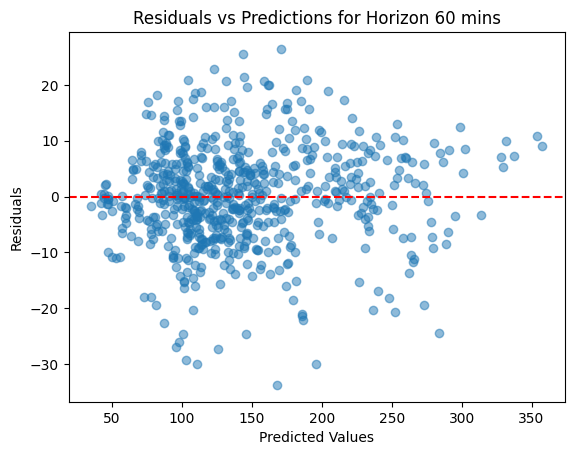

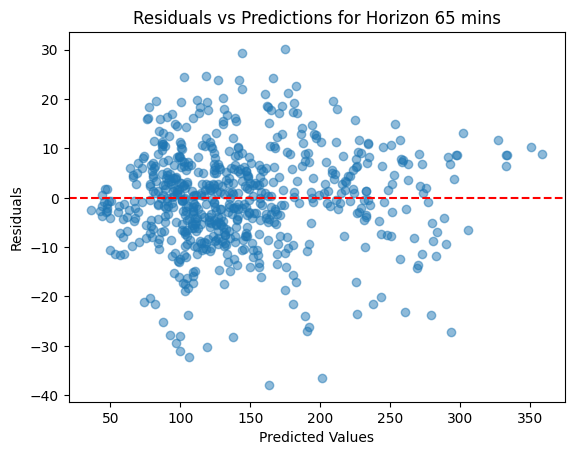

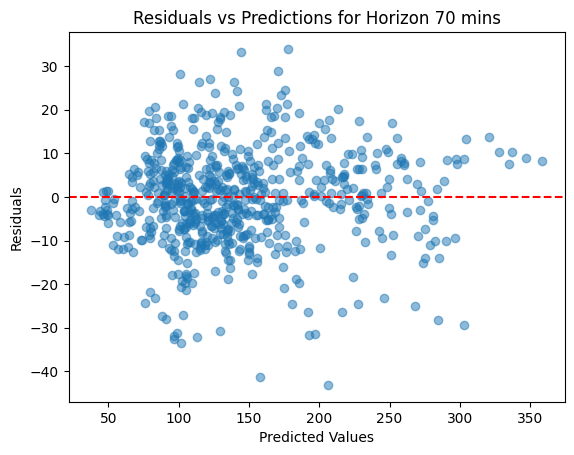

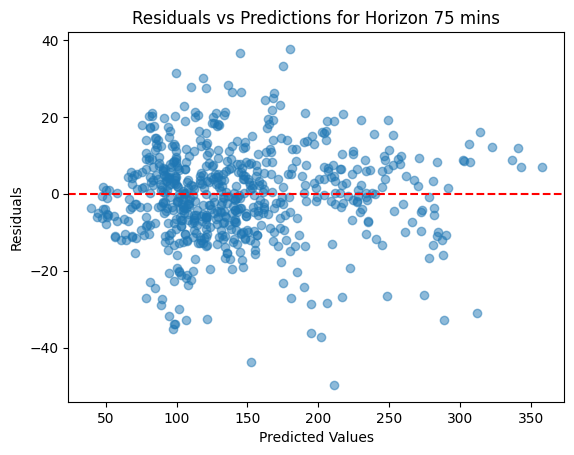

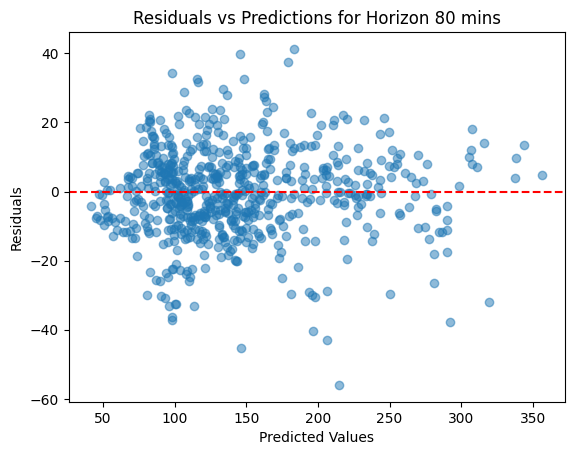

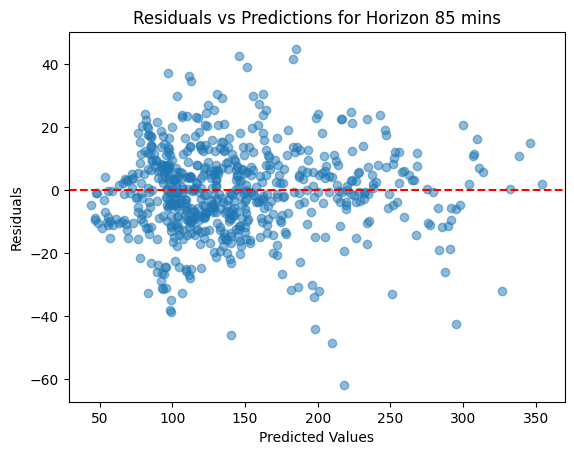

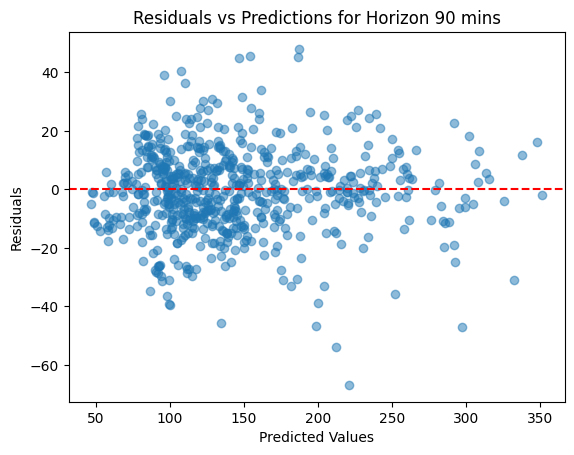

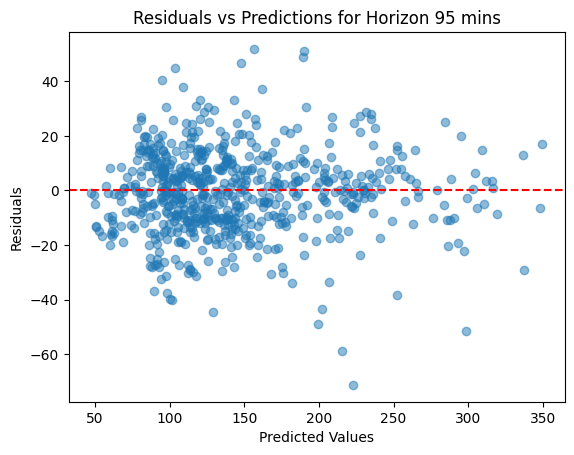

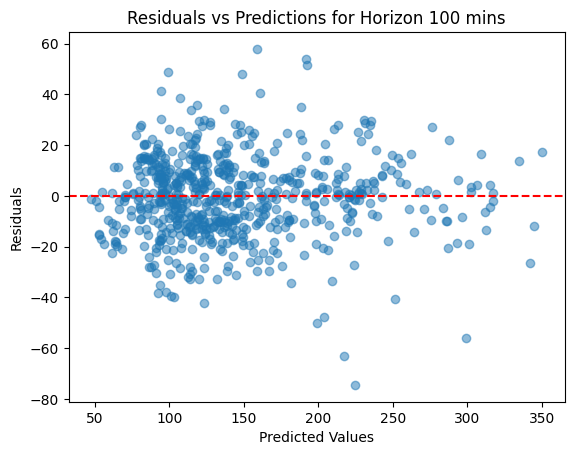

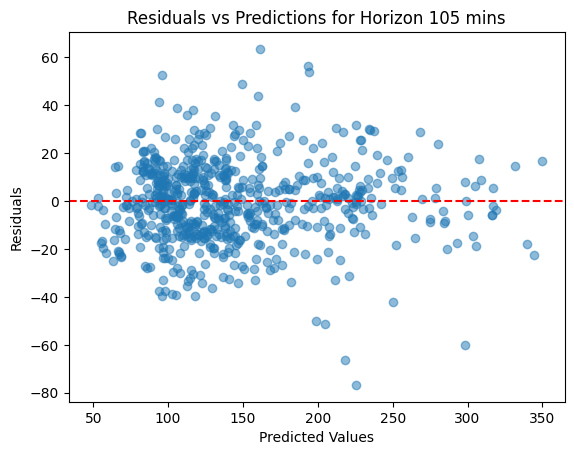

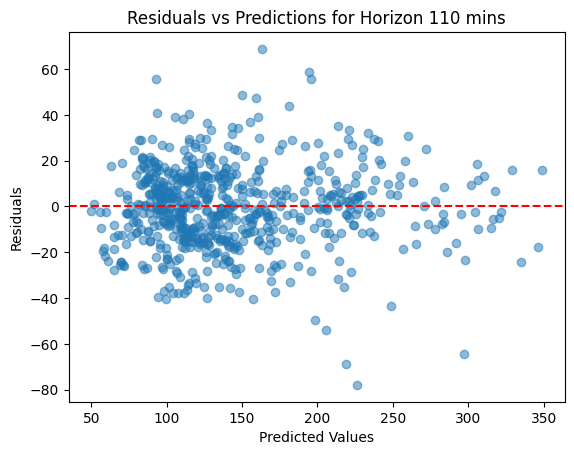

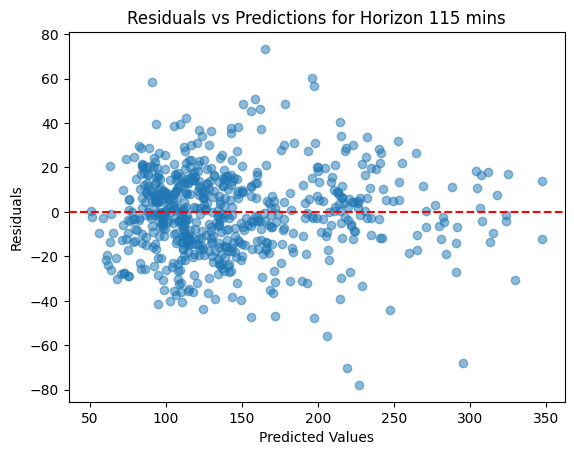

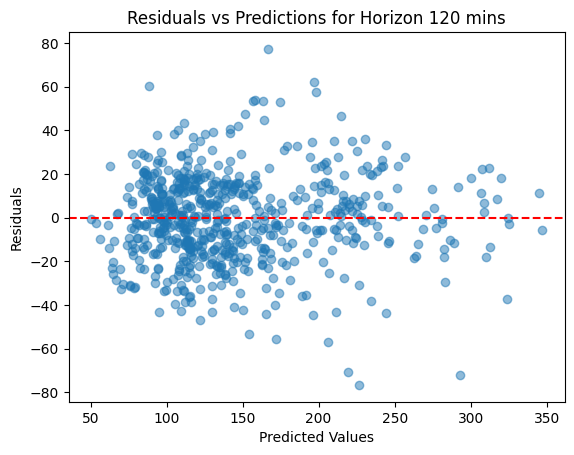

In [13]:
# Residuals

residuals_per_horizon = {f"Horizon_{h}": bg_predictor.scaler_y.inverse_transform(y_test)[:, i] - y_pred[:, i] for i, h in enumerate(horizons)}

for i, h in enumerate(horizons):
    plt.figure()
    plt.scatter(y_pred[:, i], residuals_per_horizon[f"Horizon_{h}"], alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals vs Predictions for Horizon {h} mins')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()



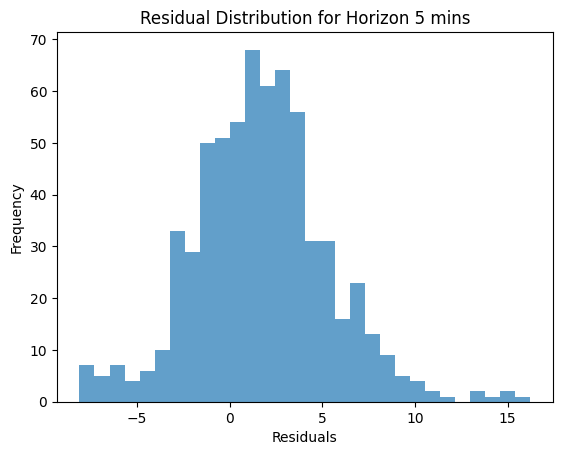

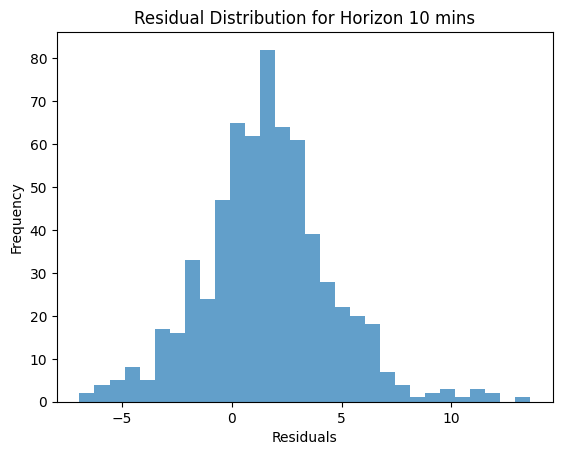

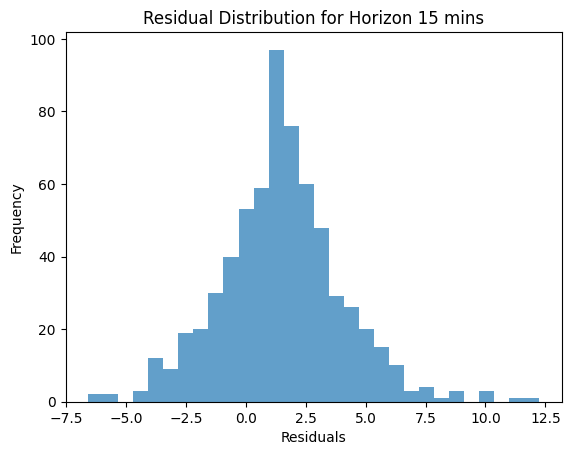

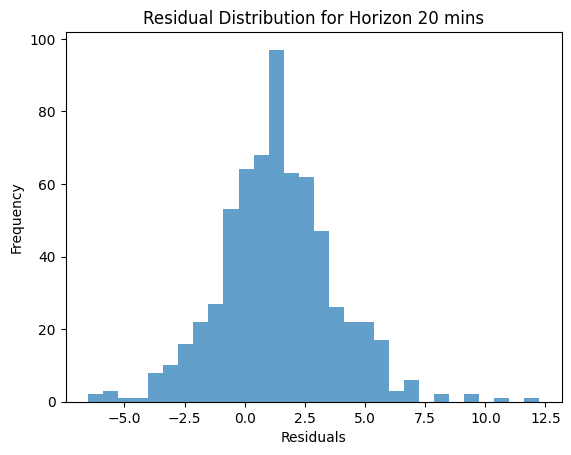

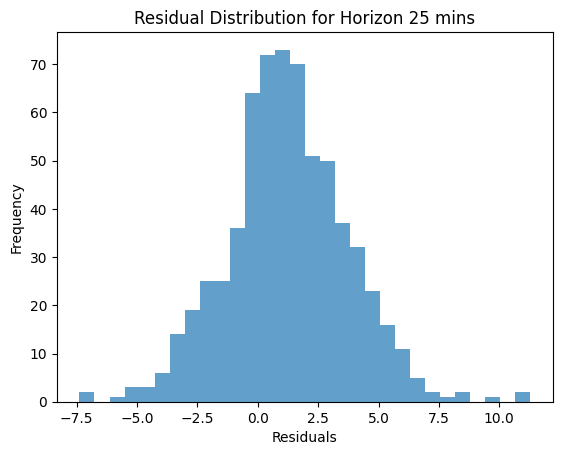

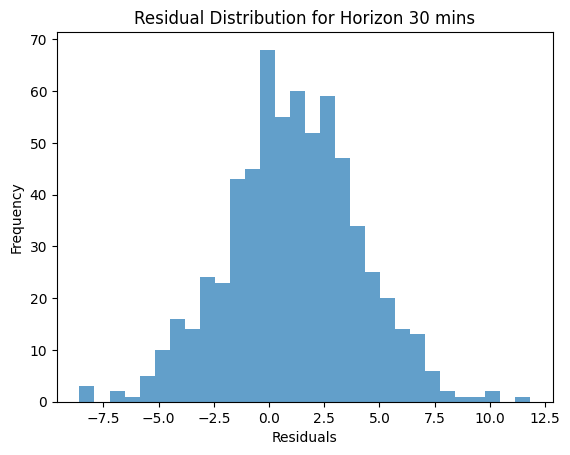

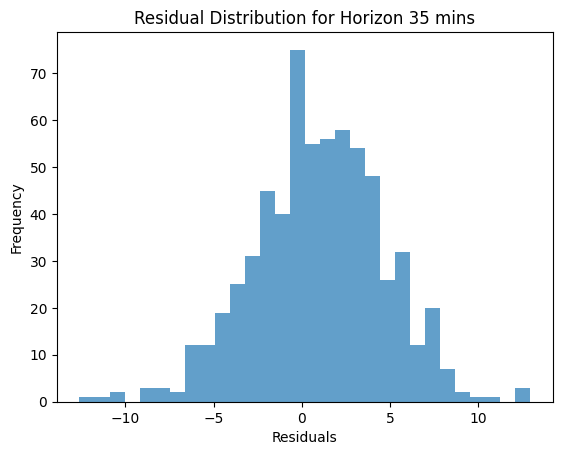

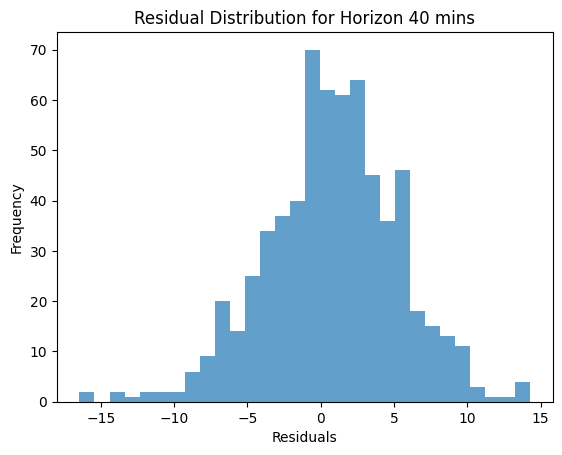

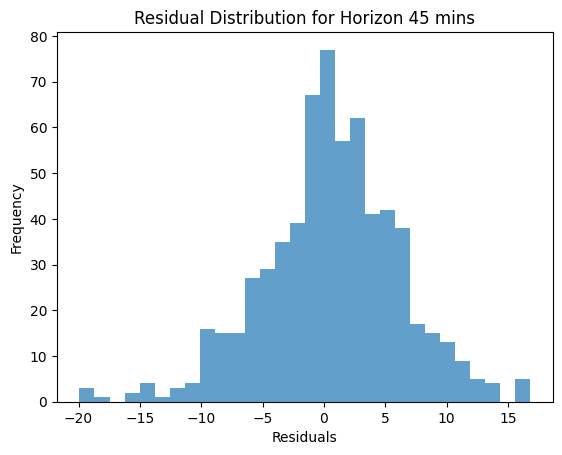

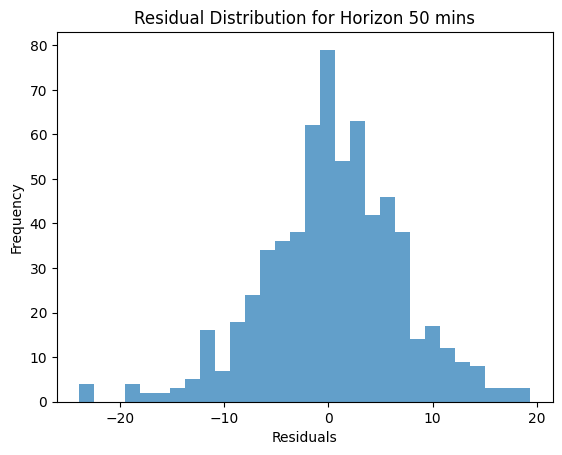

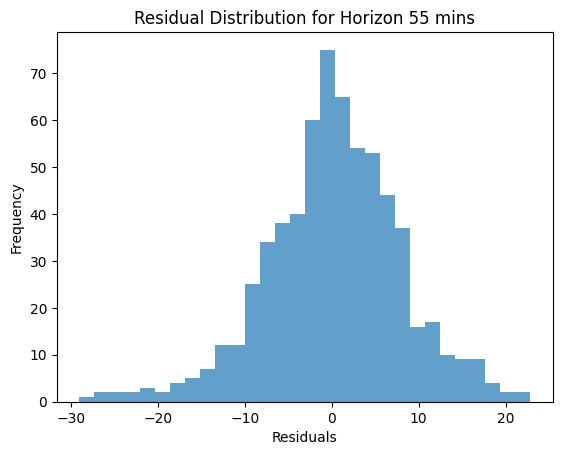

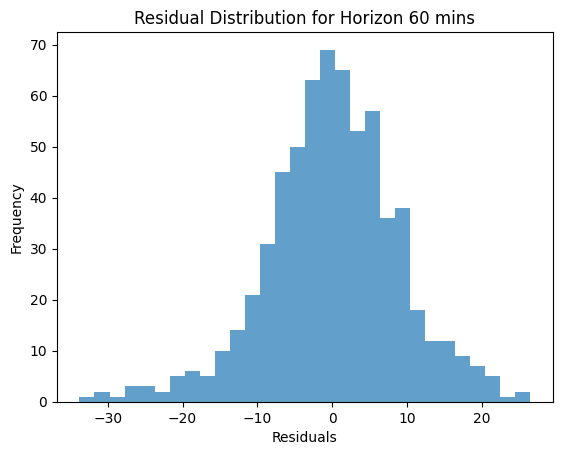

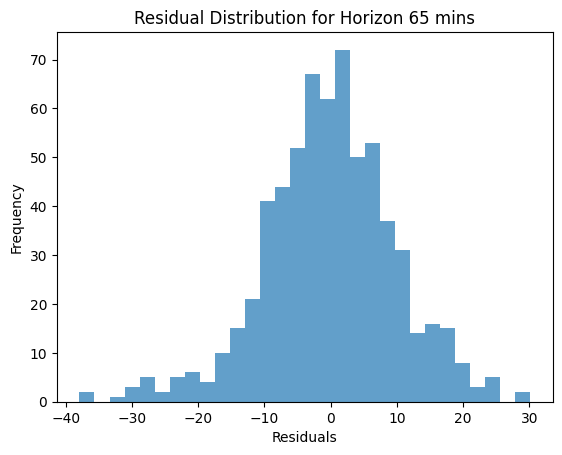

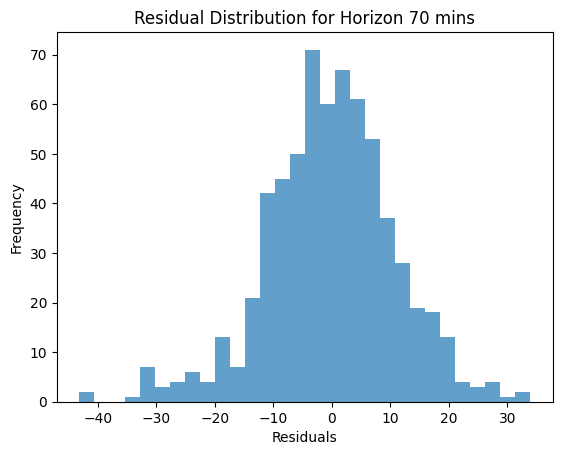

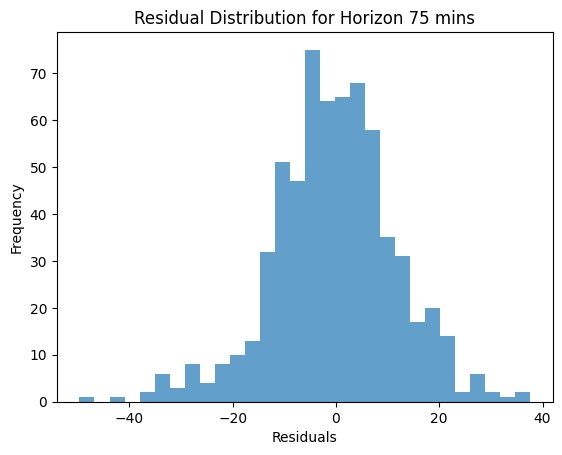

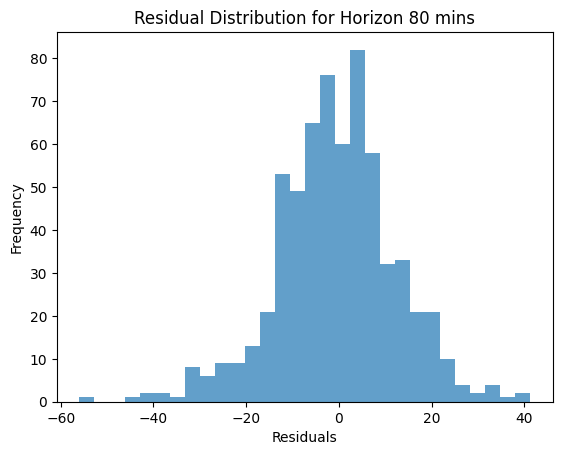

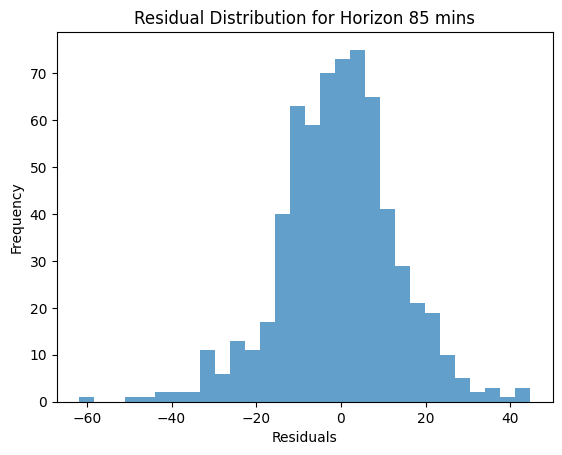

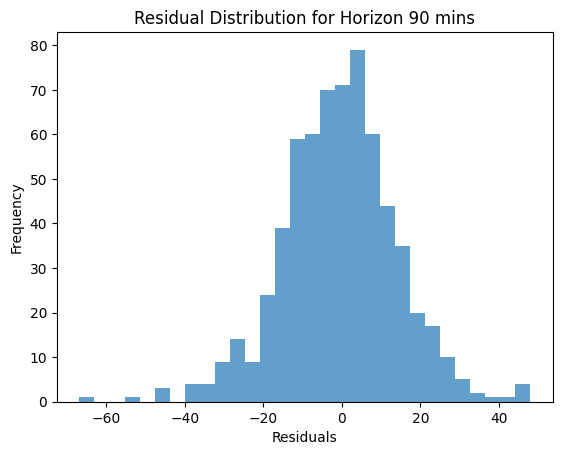

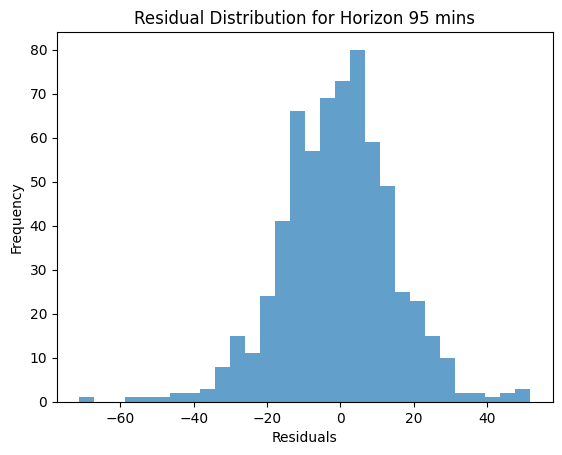

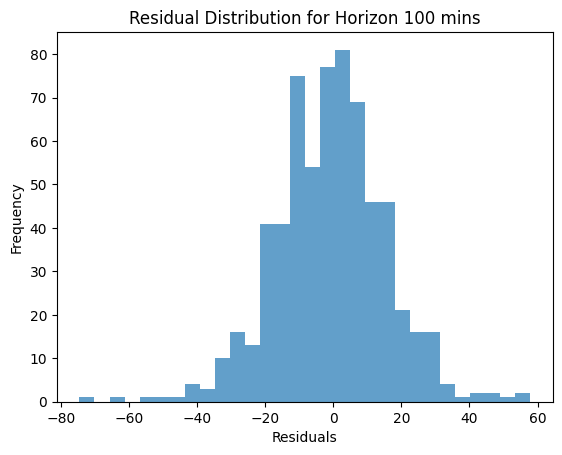

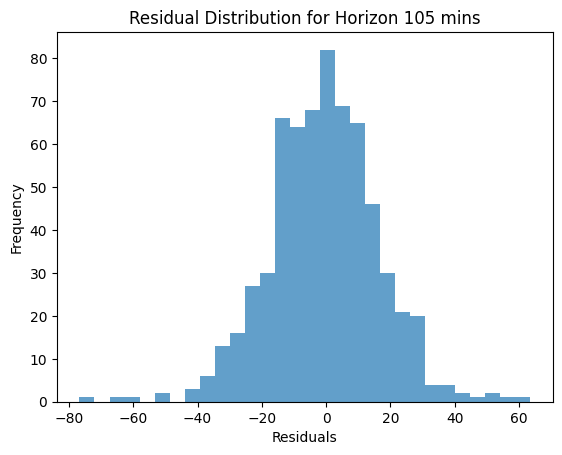

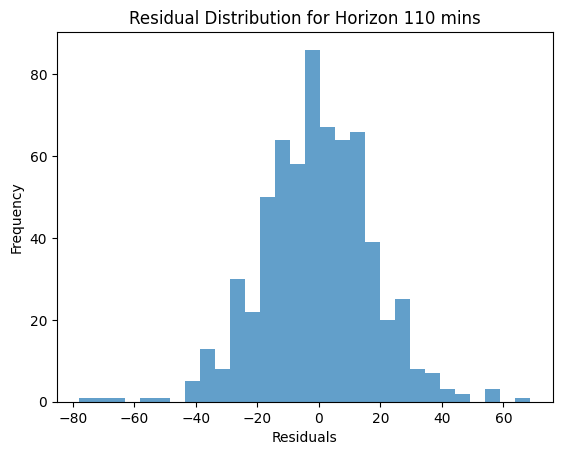

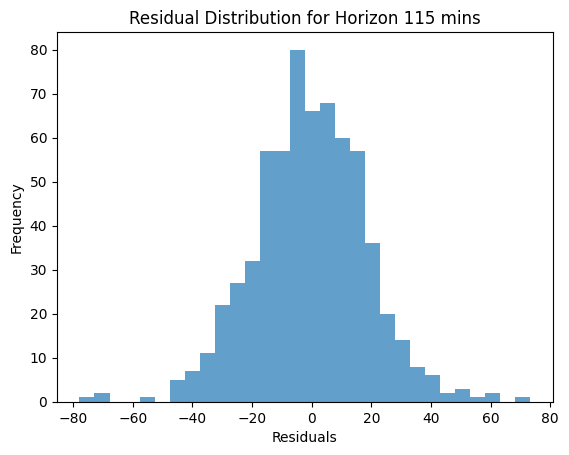

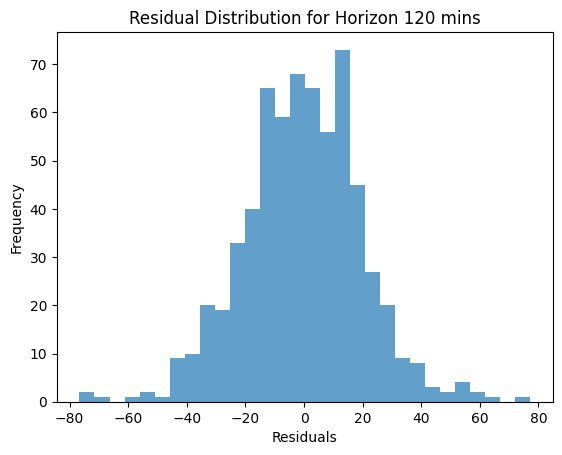

In [14]:
# Histogram of residuals

for i, h in enumerate(horizons):
    plt.figure()
    plt.hist(residuals_per_horizon[f"Horizon_{h}"], bins=30, alpha=0.7)
    plt.title(f'Residual Distribution for Horizon {h} mins')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

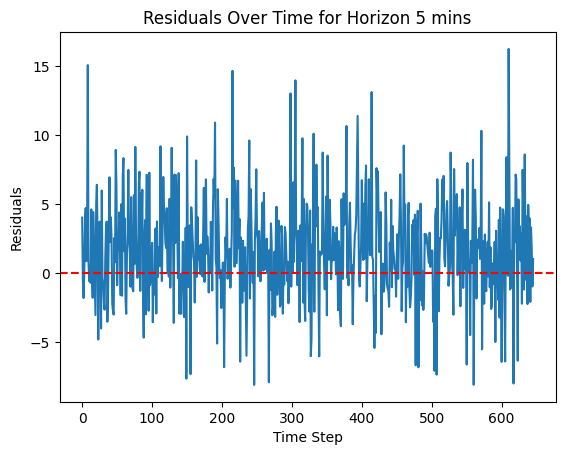

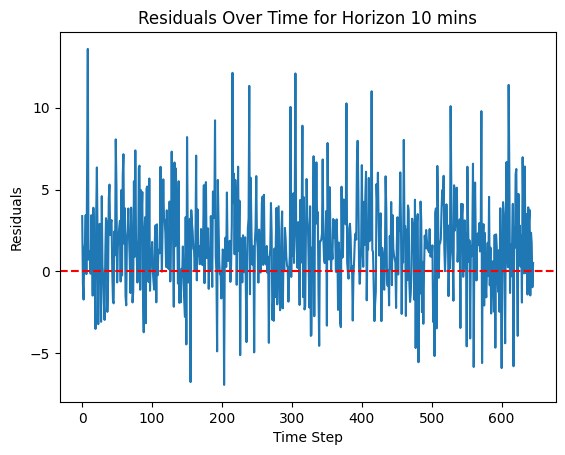

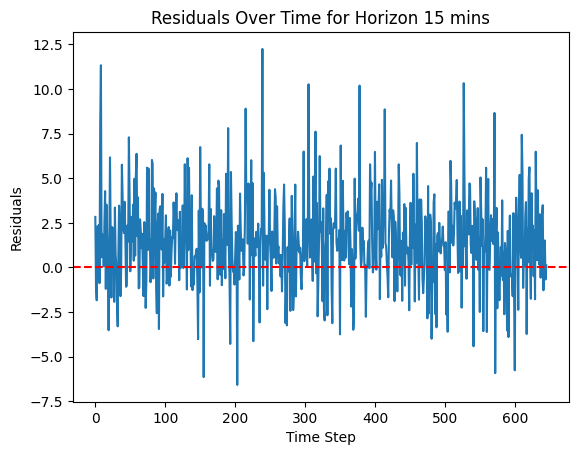

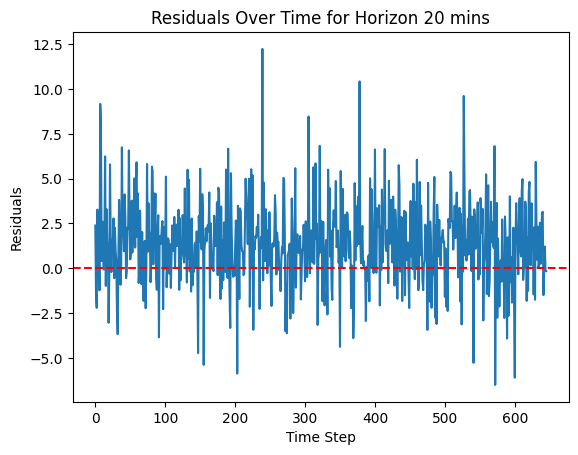

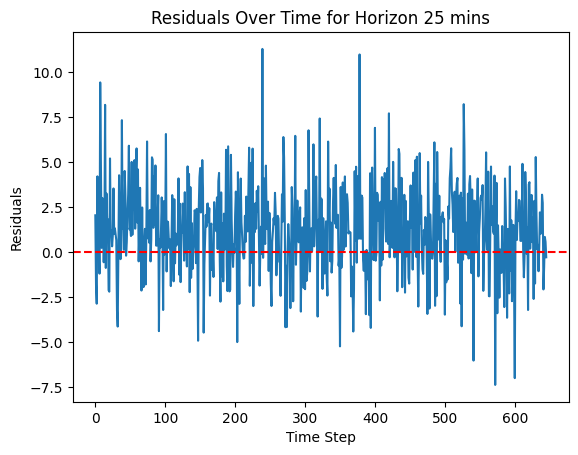

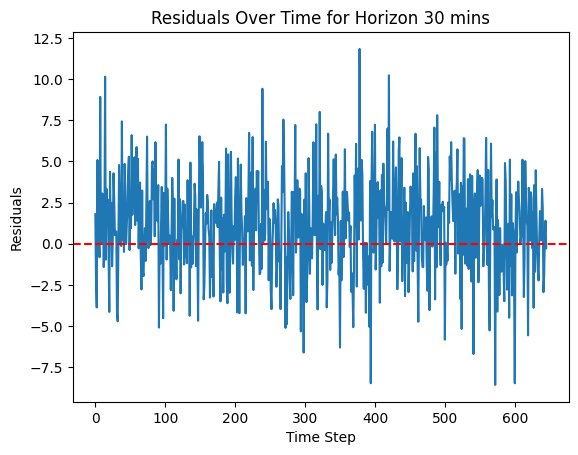

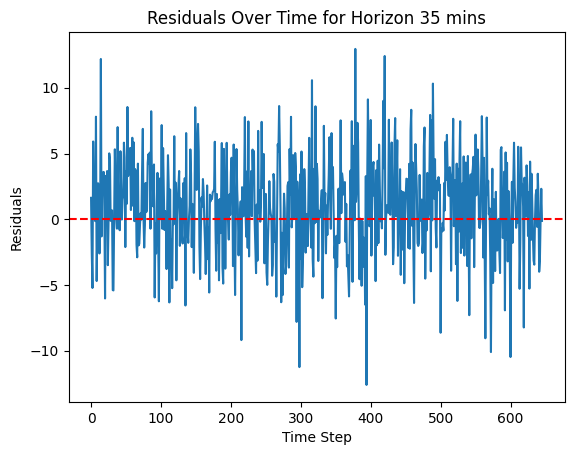

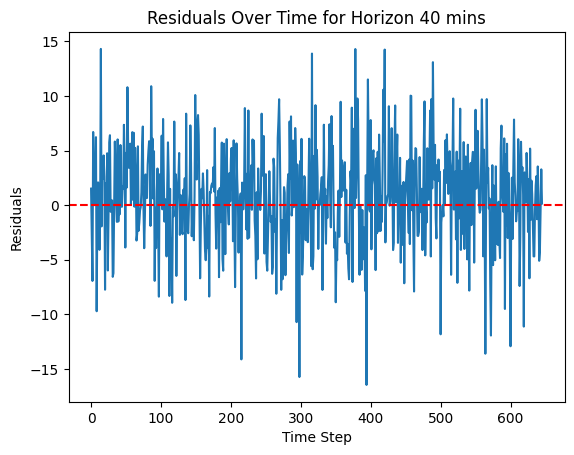

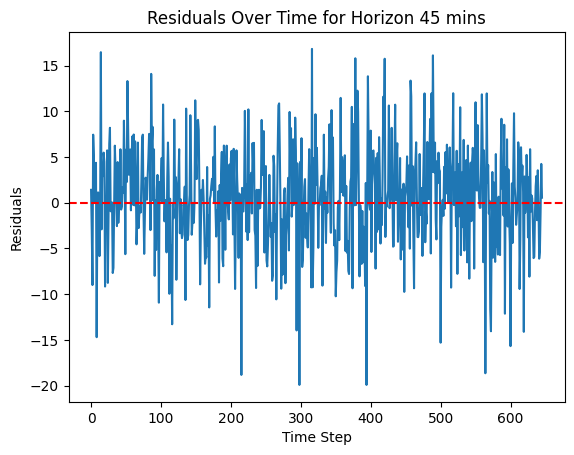

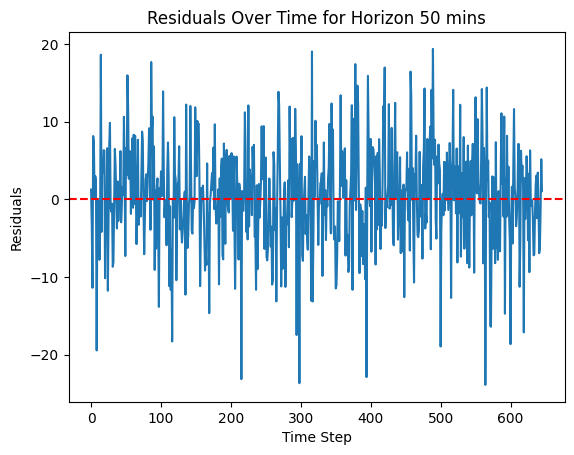

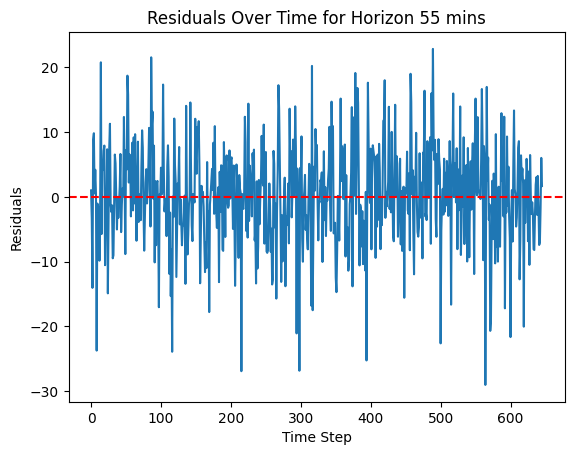

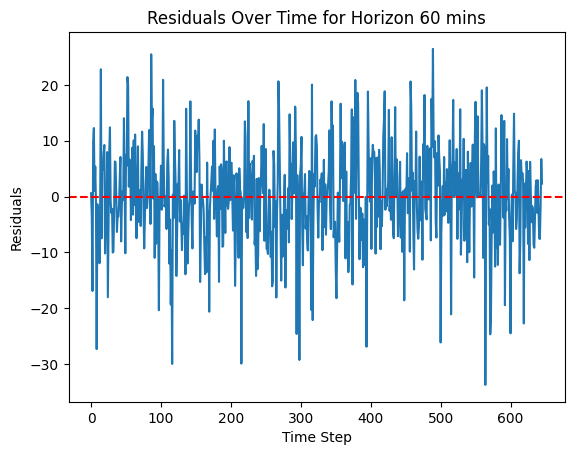

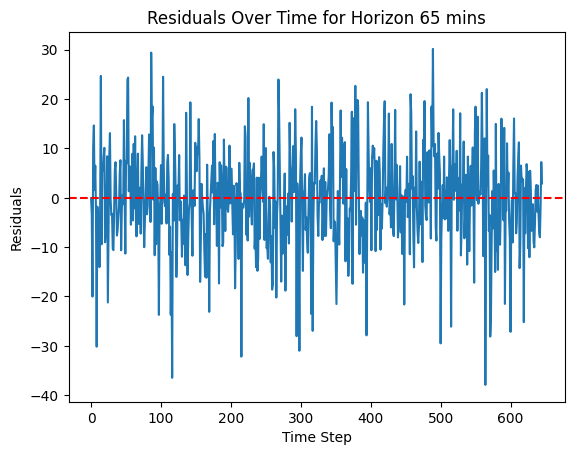

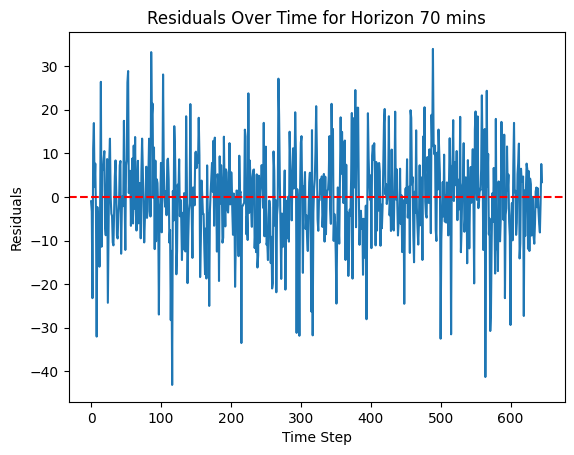

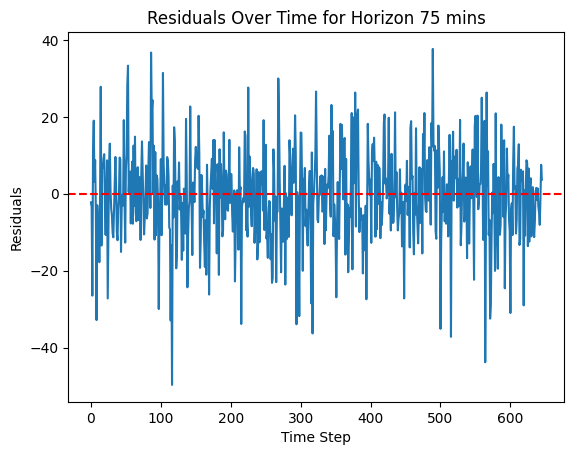

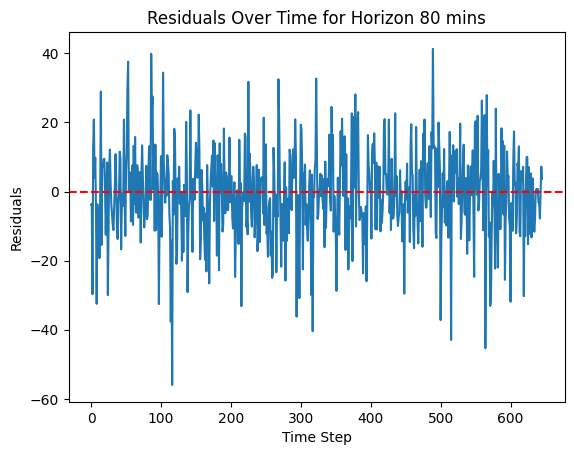

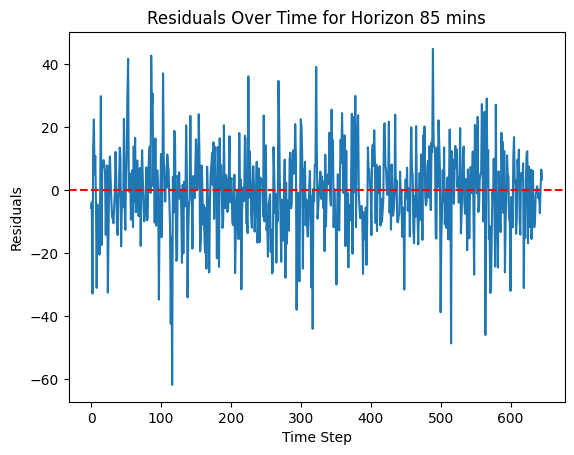

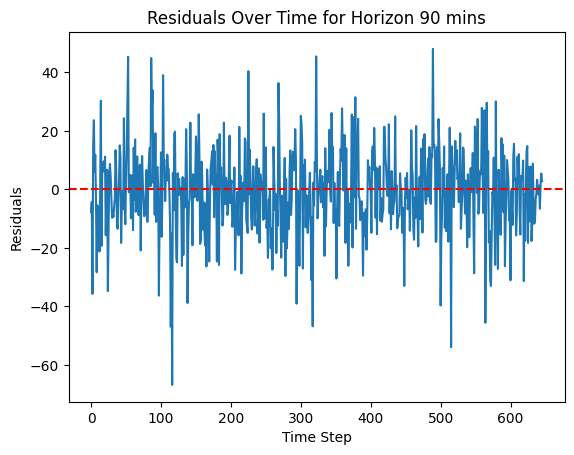

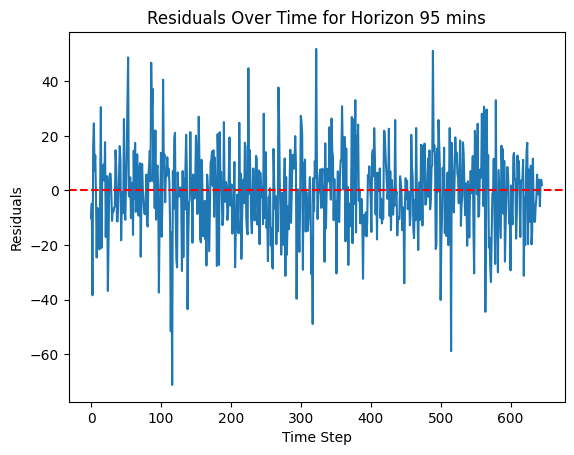

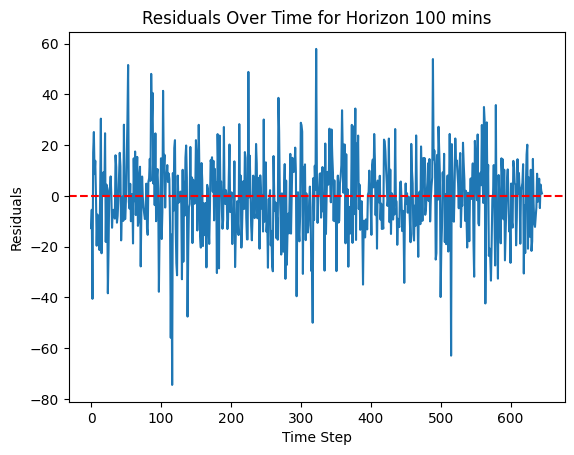

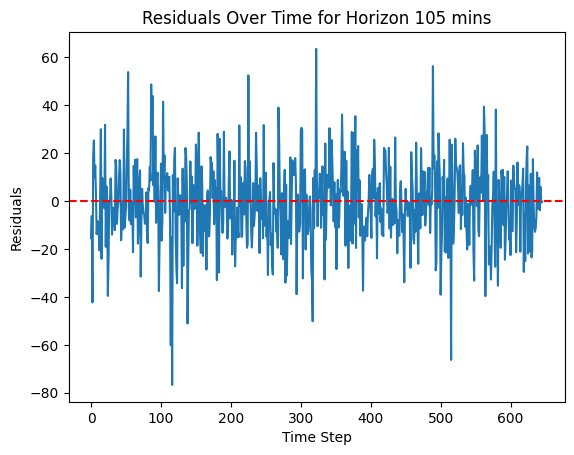

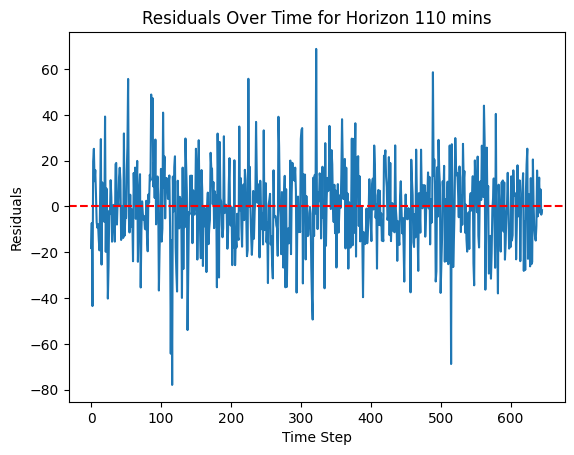

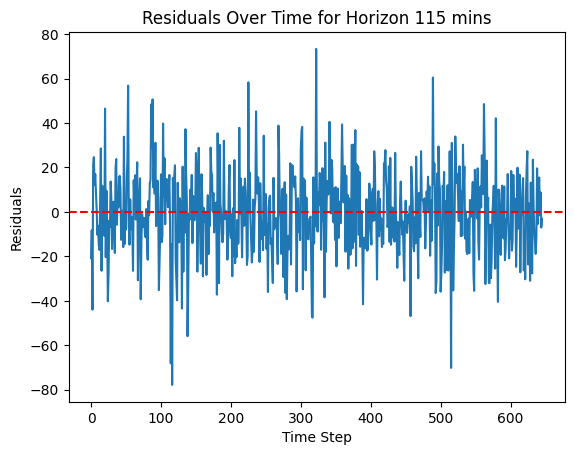

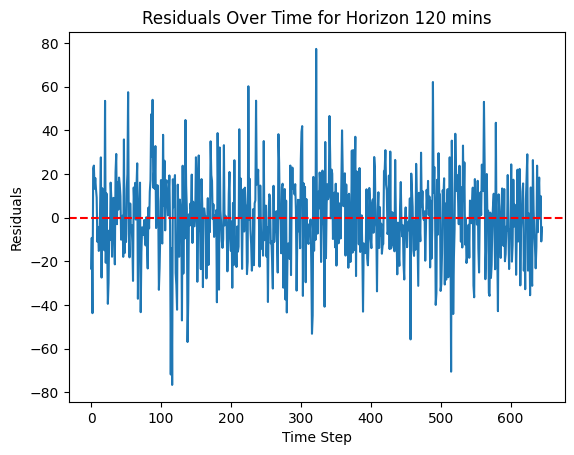

In [15]:
for i, h in enumerate(horizons):
    plt.figure()
    plt.plot(residuals_per_horizon[f"Horizon_{h}"])
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residuals Over Time for Horizon {h} mins')
    plt.xlabel('Time Step')
    plt.ylabel('Residuals')
    plt.show()

In [16]:
for h in horizons:
    res = residuals_per_horizon[f"Horizon_{h}"]
    print(f"Horizon {h} mins: Mean={np.mean(res):.2f}, Std={np.std(res):.2f}")


Horizon 5 mins: Mean=1.72, Std=3.62
Horizon 10 mins: Mean=1.61, Std=2.96
Horizon 15 mins: Mean=1.49, Std=2.52
Horizon 20 mins: Mean=1.37, Std=2.35
Horizon 25 mins: Mean=1.24, Std=2.50
Horizon 30 mins: Mean=1.10, Std=2.97
Horizon 35 mins: Mean=0.95, Std=3.69
Horizon 40 mins: Mean=0.79, Std=4.58
Horizon 45 mins: Mean=0.62, Std=5.60
Horizon 50 mins: Mean=0.44, Std=6.69
Horizon 55 mins: Mean=0.25, Std=7.82
Horizon 60 mins: Mean=0.07, Std=8.93
Horizon 65 mins: Mean=-0.11, Std=10.01
Horizon 70 mins: Mean=-0.28, Std=11.04
Horizon 75 mins: Mean=-0.42, Std=12.00
Horizon 80 mins: Mean=-0.55, Std=12.90
Horizon 85 mins: Mean=-0.64, Std=13.74
Horizon 90 mins: Mean=-0.71, Std=14.55
Horizon 95 mins: Mean=-0.75, Std=15.34
Horizon 100 mins: Mean=-0.76, Std=16.15
Horizon 105 mins: Mean=-0.73, Std=17.00
Horizon 110 mins: Mean=-0.69, Std=17.92
Horizon 115 mins: Mean=-0.61, Std=18.94
Horizon 120 mins: Mean=-0.50, Std=20.07
